# BRICS World Bank Indicators
#### Data cleaning and preparation

Source:  
https://www.kaggle.com/docstein/brics-world-bank-indicators  

Author:  
Thiago Bernardes Carvalho  

Date:  
01/11/2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn

files:  
- EducationAndEnviron_Data.csv
- HealthAndPoverty_Data.csv
- PrivateSector_Data.csv
- PublicSector_Indicators.csv
- Economy_Data.csv

In [2]:
# check if they all have the same structure

df_ed_env = pd.read_csv('source_data/EducationAndEnviron_Data.csv', sep=';')
df_ed_env['Category'] = ['Education and Enviorment']*len(df_ed_env)

df_health_pov = pd.read_csv('source_data/HealthAndPoverty_Data.csv', sep=';')
df_health_pov['Category'] = ['Health and Poverty']*len(df_health_pov)

df_priv = pd.read_csv('source_data/PrivateSector_Data.csv', sep=';')
df_priv['Category'] = ['Private Sector']*len(df_priv)

df_pub = pd.read_csv('source_data/PublicSector_Indicators.csv', sep=';')
df_pub['Category'] = ['Public Sector']*len(df_pub)

df_econ = pd.read_csv('source_data/Economy_Data.csv', sep=';')
df_econ['Category'] = ['Economy']*len(df_econ)

#df_econ

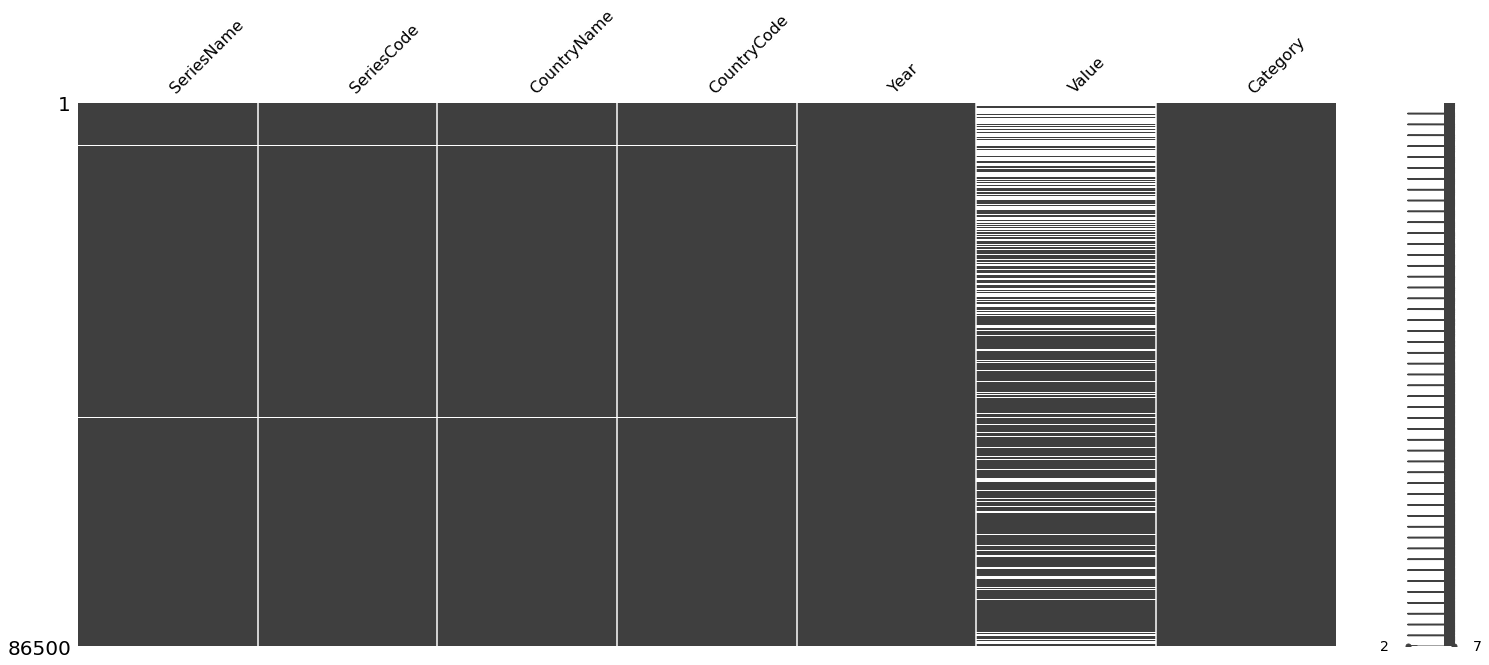

In [3]:
# check if the missing data shows any pattern
mn.matrix(df_econ)

In [4]:
# the datasets are very similar

In [5]:
df_econ.columns

Index(['SeriesName', 'SeriesCode', 'CountryName', 'CountryCode', 'Year',
       'Value', 'Category'],
      dtype='object')

In [6]:
df = pd.concat([df_ed_env, df_health_pov, df_priv, df_pub, df_econ])

In [7]:
df

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN,Education and Enviorment
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN,Education and Enviorment
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN,Education and Enviorment
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN,Education and Enviorment
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN,Education and Enviorment
...,...,...,...,...,...,...,...
86495,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86496,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86497,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86498,Data from database: World Development Indicators,NaN,NaN,NaN,2019.0,NaN,Economy


In [8]:
print('unique series names: ', len(df.SeriesName.unique()))
print('unique series codes: ', len(df.SeriesCode.unique()))

unique series names:  1375
unique series codes:  1373


In [9]:
# two mismatched identifiers

In [10]:
df_econ.sort_values('SeriesCode', ascending=False)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
8432,"PPP conversion factor, private consumption (LC...",PA.NUS.PRVT.PP,India,IND,1974.0,NaN,Economy
65524,"PPP conversion factor, private consumption (LC...",PA.NUS.PRVT.PP,South Africa,ZAF,2007.0,4.230775,Economy
56873,"PPP conversion factor, private consumption (LC...",PA.NUS.PRVT.PP,Russian Federation,RUS,2002.0,10.049132,Economy
56872,"PPP conversion factor, private consumption (LC...",PA.NUS.PRVT.PP,India,IND,2002.0,10.325889,Economy
56871,"PPP conversion factor, private consumption (LC...",PA.NUS.PRVT.PP,China,CHN,2002.0,3.546303,Economy
...,...,...,...,...,...,...,...
86495,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86496,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86497,NaN,NaN,NaN,NaN,2019.0,NaN,Economy
86498,Data from database: World Development Indicators,NaN,NaN,NaN,2019.0,NaN,Economy


In [11]:
# 'Data from database: World Development Indicators' and 'Last Updated: 10/15/2020'
# The two mismatched records are garbage

In [12]:
# lots of empty rows
mask = pd.isnull(df.SeriesName)
len(df[mask])

# check the empty names (remove comment)
#print(df[mask].head(50))
#print(df[mask].tail(50))

750

In [13]:
df[~mask]

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN,Education and Enviorment
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN,Education and Enviorment
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN,Education and Enviorment
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN,Education and Enviorment
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN,Education and Enviorment
...,...,...,...,...,...,...,...
86492,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,India,IND,2019.0,5.501237e+09,Economy
86493,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,Russian Federation,RUS,2019.0,7.843114e+09,Economy
86494,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,South Africa,ZAF,2019.0,2.468918e+09,Economy
86498,Data from database: World Development Indicators,NaN,NaN,NaN,2019.0,NaN,Economy


In [14]:
# drop 750 rows with missing series name
df = df[~mask]

In [15]:
# check series code
mask = pd.isnull(df.SeriesCode)
len(df[mask])

# check the empty names (remove comment)
#print(df[mask].head(50))
#print(df[mask].tail(50))

500

In [16]:
df[~mask]

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN,Education and Enviorment
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN,Education and Enviorment
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN,Education and Enviorment
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN,Education and Enviorment
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN,Education and Enviorment
...,...,...,...,...,...,...,...
86490,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,Brazil,BRA,2019.0,3.992325e+09,Economy
86491,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,China,CHN,2019.0,9.665492e+09,Economy
86492,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,India,IND,2019.0,5.501237e+09,Economy
86493,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,Russian Federation,RUS,2019.0,7.843114e+09,Economy


In [17]:
# drop 500 rows with missing series code
df = df[~mask]

In [18]:
# check values
mask = pd.isnull(df.Value)
len(df[mask])

# check the empty names (remove comment)
#print(df_econ[mask].head(50))
#print(df_econ[mask].tail(50))

185515

In [19]:
df[~mask]

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970.0,6.766915e+01,Education and Enviorment
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970.0,6.824207e+01,Education and Enviorment
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970.0,6.709642e+01,Education and Enviorment
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970.0,2.337805e+01,Education and Enviorment
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970.0,3.990094e+01,Education and Enviorment
...,...,...,...,...,...,...,...
86490,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,Brazil,BRA,2019.0,3.992325e+09,Economy
86491,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,China,CHN,2019.0,9.665492e+09,Economy
86492,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,India,IND,2019.0,5.501237e+09,Economy
86493,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,Russian Federation,RUS,2019.0,7.843114e+09,Economy


In [20]:
# drop 185,515 rows with missing value
df = df[~mask]

In [21]:
# check other fields

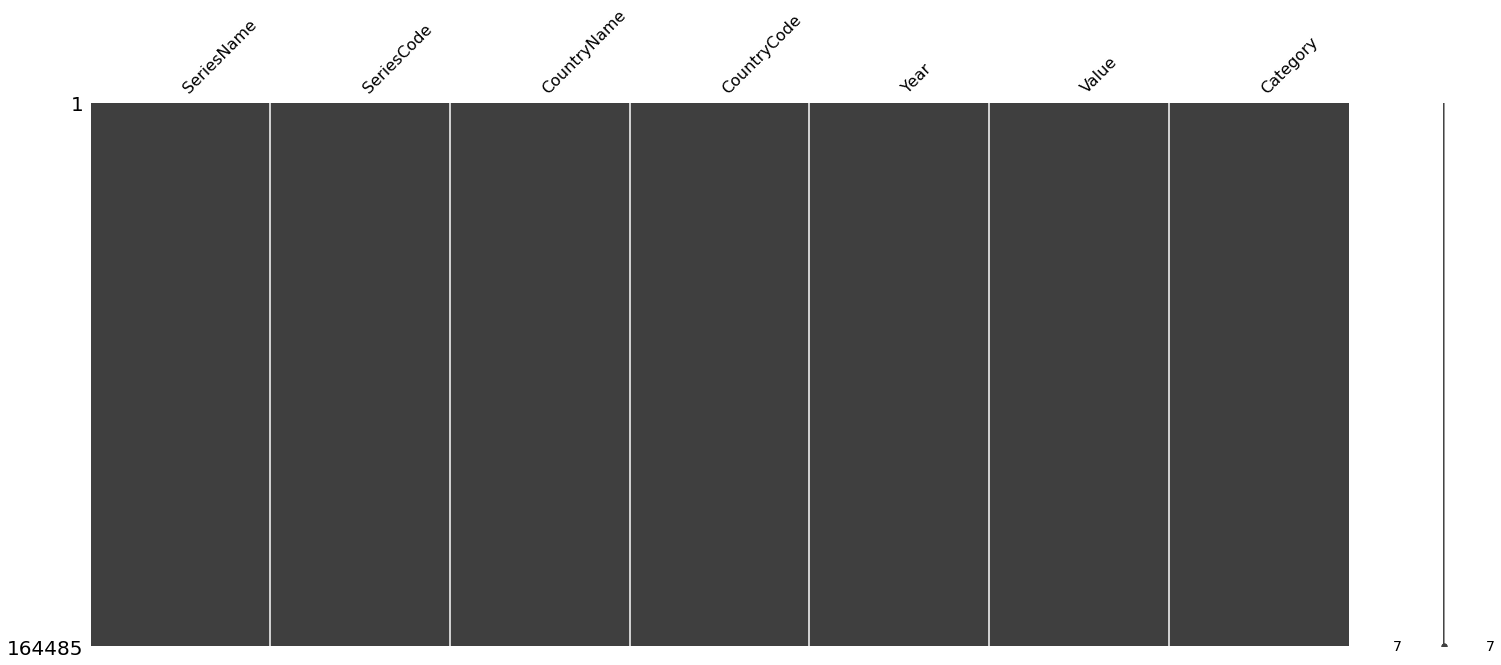

In [22]:
mn.matrix(df)

In [23]:
# check for mismatches in country code and country name fields

In [24]:
df.CountryCode.unique()

array(['ZAF', 'BRA', 'CHN', 'IND', 'RUS'], dtype=object)

In [25]:
# check combinations and count their records
df.groupby(['CountryCode', 'CountryName']).size().reset_index().rename(columns={0:'count'})

,CountryCode,CountryName,count
0,BRA,Brazil,36688
1,CHN,China,30191
2,IND,India,36229
3,RUS,Russian Federation,26529
4,ZAF,South Africa,34848


In [26]:
# there are no mismatching country codes / names

In [35]:
# Name Dimension
cols = ['SeriesName', 'SeriesCode', 'Category']
d_name = pd.DataFrame(df.groupby(cols).count().index.tolist()).rename(columns={0:cols[0], 1:cols[1], 2:cols[2]})
d_name.groupby('SeriesCode').count().sort_values('SeriesName', ascending=False)[:20]

,SeriesName,Category
SeriesCode,,
SI.DST.03RD.20,2,2
SI.DST.FRST.20,2,2
SI.SPR.PCAP,2,2
SI.SPR.PC40.ZG,2,2
SI.SPR.PC40,2,2
SI.POV.UMIC.GP,2,2
SI.POV.UMIC,2,2
SI.POV.NAHC,2,2
SI.POV.LMIC.GP,2,2


In [28]:
df[(df['SeriesCode'] == 'SI.DST.03RD.20') & (df['Year'] == 2015)]

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Category
62900,Income share held by third 20%,SI.DST.03RD.20,Brazil,BRA,2015.0,12.4,Health and Poverty
62901,Income share held by third 20%,SI.DST.03RD.20,China,CHN,2015.0,15.3,Health and Poverty
62903,Income share held by third 20%,SI.DST.03RD.20,Russian Federation,RUS,2015.0,15.2,Health and Poverty
74150,Income share held by third 20%,SI.DST.03RD.20,Brazil,BRA,2015.0,12.4,Public Sector
74151,Income share held by third 20%,SI.DST.03RD.20,China,CHN,2015.0,15.3,Public Sector
74153,Income share held by third 20%,SI.DST.03RD.20,Russian Federation,RUS,2015.0,15.2,Public Sector


In [29]:
# The same 'Series', both name and code, are present in different categories
# That means we'll need a new index for the 'Series' when creating our fact table and dimensions

In [30]:
# Create new index
d_name.reset_index(inplace=True)
d_name

,index,SeriesName,SeriesCode,Category
0,0,ARI treatment (% of children under 5 taken to ...,SH.STA.ARIC.ZS,Health and Poverty
1,1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Education and Enviorment
2,2,Access to electricity (% of population),EG.ELC.ACCS.ZS,Education and Enviorment
3,3,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,Education and Enviorment
4,4,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,Education and Enviorment
...,...,...,...,...
1359,1359,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,Education and Enviorment
1360,1360,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,Health and Poverty
1361,1361,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,Health and Poverty
1362,1362,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,Health and Poverty


In [31]:
df = pd.merge(df, d_name, on=['SeriesName', 'SeriesCode', 'Category'])

In [32]:
# Country Dimension
cols = ['CountryName', 'CountryCode']
d_country = pd.DataFrame(df.groupby(cols).count().index.tolist()).rename(columns={0:cols[0], 1:cols[1]})
d_country

,CountryName,CountryCode
0,Brazil,BRA
1,China,CHN
2,India,IND
3,Russian Federation,RUS
4,South Africa,ZAF


In [38]:
# Fact table
fact = df[['index', 'CountryCode', 'Year', 'Value']].rename(columns={'index':'SeriesIndex'})
fact

,SeriesIndex,CountryCode,Year,Value
0,9,ZAF,1970.0,6.766915e+01
1,9,IND,1971.0,6.104195e+01
2,9,CHN,1987.0,9.284520e+01
3,9,CHN,1988.0,9.458020e+01
4,9,CHN,1989.0,9.613547e+01
...,...,...,...,...
164480,1032,BRA,2019.0,2.204289e+11
164481,1032,CHN,2019.0,2.634664e+11
164482,1032,IND,2019.0,1.709999e+11
164483,1032,RUS,2019.0,1.940625e+11


In [39]:
# save files
d_name.to_csv('clean_data/names.csv')
d_country.to_csv('clean_data/countries.csv')
fact.to_csv('clean_data/brics.csv')

In [72]:
# we'll build an intermediary dimension that will be used to filter years
# the idea is to be able to select a 'max' year, 
# where the last available data will be displayed not necessarily the data for the selected year

years = sorted(df.Year.unique())
filter_years = []
relationship_years = []
for idx, value in enumerate(years):
    for i in range(idx+1):
        filter_years.append(value)
        relationship_years.append(years[idx-i])
        
d_years = pd.DataFrame({'Years': relationship_years, 'Filter_Years': filter_years})
d_years

,Years,Filter_Years
0,1970.0,1970.0
1,1971.0,1971.0
2,1970.0,1971.0
3,1972.0,1972.0
4,1971.0,1972.0
...,...,...
1270,1974.0,2019.0
1271,1973.0,2019.0
1272,1972.0,2019.0
1273,1971.0,2019.0


In [73]:
d_years.to_csv('clean_data/years.csv')